In [128]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
taxi = pd.read_csv('/home/jupyter-l.fedoseeva-12/Lesson_4/taxi_peru (1).csv', sep=';')

In [78]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])

In [79]:
new_columns = taxi.arrived_at - taxi.start_at
taxi['wait_time'] = new_columns.astype('timedelta64[m]')

In [95]:
taxi['month'] = taxi['start_at'].dt.month

In [96]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [82]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [83]:
taxi.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [94]:
taxi.query('month == [5, 6, 7]') \
    .groupby('month', as_index=False) \
    .agg({'journey_id': 'count'})

,month,journey_id
0,5,1585
1,6,1939
2,7,1516


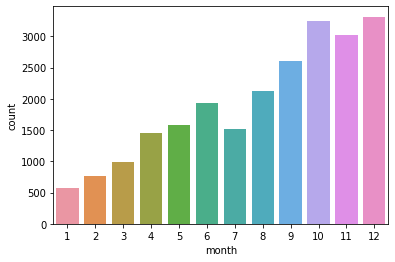

In [85]:
ax = sns.countplot(x="month", data=taxi)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


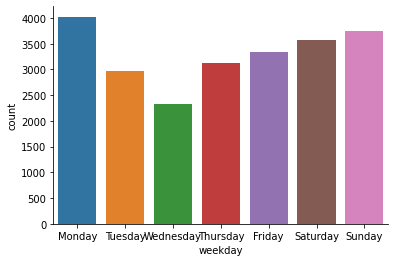

In [86]:
bx = sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                           'Friday', 'Saturday', 'Sunday'])
sns.despine()

In [97]:
taxi['end_state'].value_counts()

drop off         17417
rider cancel      3976
not found         1145
driver cancel      292
failure            249
no show             20
Name: end_state, dtype: int64

In [142]:
mau = (
    taxi.groupby('month') \
   .agg({'user_id': pd.Series.nunique})
)

In [103]:
# taxi_2 = taxi.groupby('month')['user_id'].nunique()     второй способ

In [140]:
mau

,month,user_id
0,1,102
1,2,111
2,3,163
3,4,254
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


In [152]:
plt.figure(figsize=(10, 6.5))
sns.lineplot(data=mau, markers = 'o-')

ValueError: The `markers` argument has the wrong number of values

<Figure size 720x468 with 0 Axes>